# What Makes a Successful Kickstarter Campaign?

**Author**: Jocelyn Lutes

## Problem Statement

## Executive Summary

## Table of Contents

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read-In Data

Source: [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects)

In [2]:
df = pd.read_csv('../data/ks-projects-201801.csv')

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.shape

(378661, 15)

This dataset contains data for 378,661 global Kickstarter campaigns.

## Clean Data

### Check for Null/Missing Values

In [5]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

This data set is missing pledge conversions for 3797 campaigns. Because this column will be dropped, we will ignore the missing values for now.

### Check Data Types

In [7]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

#### Convert `ID` to a string

In [8]:
df['ID'] = df['ID'].map(str)

#### Convert `deadline` to a datetime object

In [83]:
df['deadline'] = pd.to_datetime(df['deadline'])

In [81]:
df['deadline'].dtype

dtype('O')

#### Convert `launched` to a datetime object

In [84]:
df['launched'] = pd.to_datetime(df['launched'])

### Limit Data to Only Campaigns in the USA
For simplicity, for this analysis we will only be concerned with campaigns that were run in the United States

In [14]:
df = df[df['country'] == 'US']

### Drop `usd_pledged`, `usd_pledged_real`, and `usd_goal_real` columns
Because we are limiting our campaigns to those that occurred in the US, we will not need to convert the pledges and goals to USD. Therefore, these columns can be dropped.

In [11]:
df.drop(columns = ['usd pledged', 'usd_pledged_real', 'usd_goal_real'], inplace = True)

### Title Case Outcomes in `state`

In [12]:
df['state'] = df['state'].str.title()

### Rename `state` to `Campaign Status`

In [13]:
df = df.rename(columns = {'state':'Campaign Status'})

## Exploratory Data Analysis

In this section, we will explore the data in an attempt to gain insights about which features are different between successful and failed campaigns.

### Functions

#### Create a Count Plot

In [15]:
def plot_countplot(data, column, hue = None, orient = None, size = (10,6), title = '', x_label = '', y_label = '', color = 'limegreen', palette = None):
    plt.figure(figsize = size)
    sns.countplot(data[column], hue = hue, orient = orient, color = color, palette = palette, lw = 1.0, edgecolor = 'black');
    hfont = {'fontname': 'Helvetica Neue'}
    plt.xlabel(x_label, fontdict = {'fontsize':16}, labelpad = 8, **hfont)
    plt.ylabel(y_label, fontdict = {'fontsize':16}, labelpad = 8, **hfont)
    plt.title(title, fontdict = {'fontsize':20}, pad = 8, **hfont)
    plt.xticks(size = 13, **hfont)
    plt.yticks(size = 13, **hfont)
    plt.tight_layout();

### How many campaigns have succeeded vs. failed?

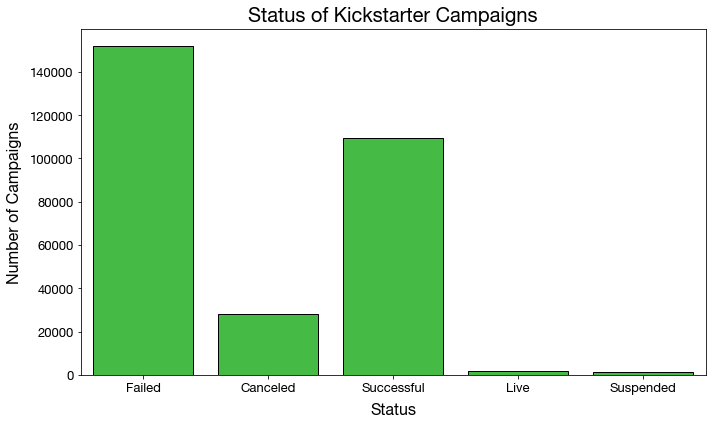

In [16]:
plot_countplot(data = df, 
               column = 'Campaign Status',
               title = 'Status of Kickstarter Campaigns',
               x_label = 'Status',
               y_label = 'Number of Campaigns')

As shown in the figure above, there were more failed campaigns than successful campaigns.

#### Limit to Successful or Failed Campaigns
Because we are only interested in campaigns with a set outcome (i.e. failed or successful), we will filter the data frame to only include failed or sucessful campaigns.

In [17]:
mask_failed = df['Campaign Status'] == 'Failed'
mask_success = df['Campaign Status'] == 'Successful'

df = df[mask_failed | mask_success]

In [68]:
df['Campaign Status'].value_counts(normalize = True)

Failed        0.581804
Successful    0.418196
Name: Campaign Status, dtype: float64

When the data is limited to only successes or failures, ~58.2% of campaigns are failed and ~41.8% of campaigns are successful.

### What types of projects are most successful?

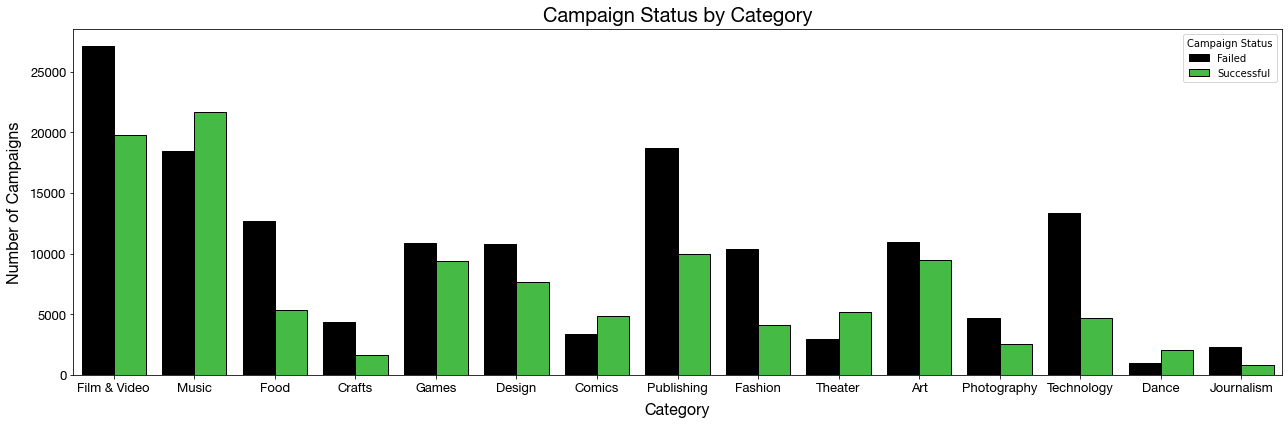

In [18]:
plot_countplot(data = df,
               column = 'main_category',
               hue = df['Campaign Status'],
               orient = 'h',
               size = (18, 6),
               color = None,
               palette = ['black', 'limegreen'],
               title = 'Campaign Status by Category',
               x_label = 'Category',
               y_label = 'Number of Campaigns')

From the above figure, we can see that **Music** and **Dance** appear to have more successful campaigns than failed campaigns. We can explore the subcategories for each of these to see if one type of dance or genre of music is driving the results.

In [19]:
def get_subcategory(data, category):
    return df[df['main_category'] == category]

music_subs = get_subcategory(df, 'Music')
dance_subs = get_subcategory(df, 'Dance')

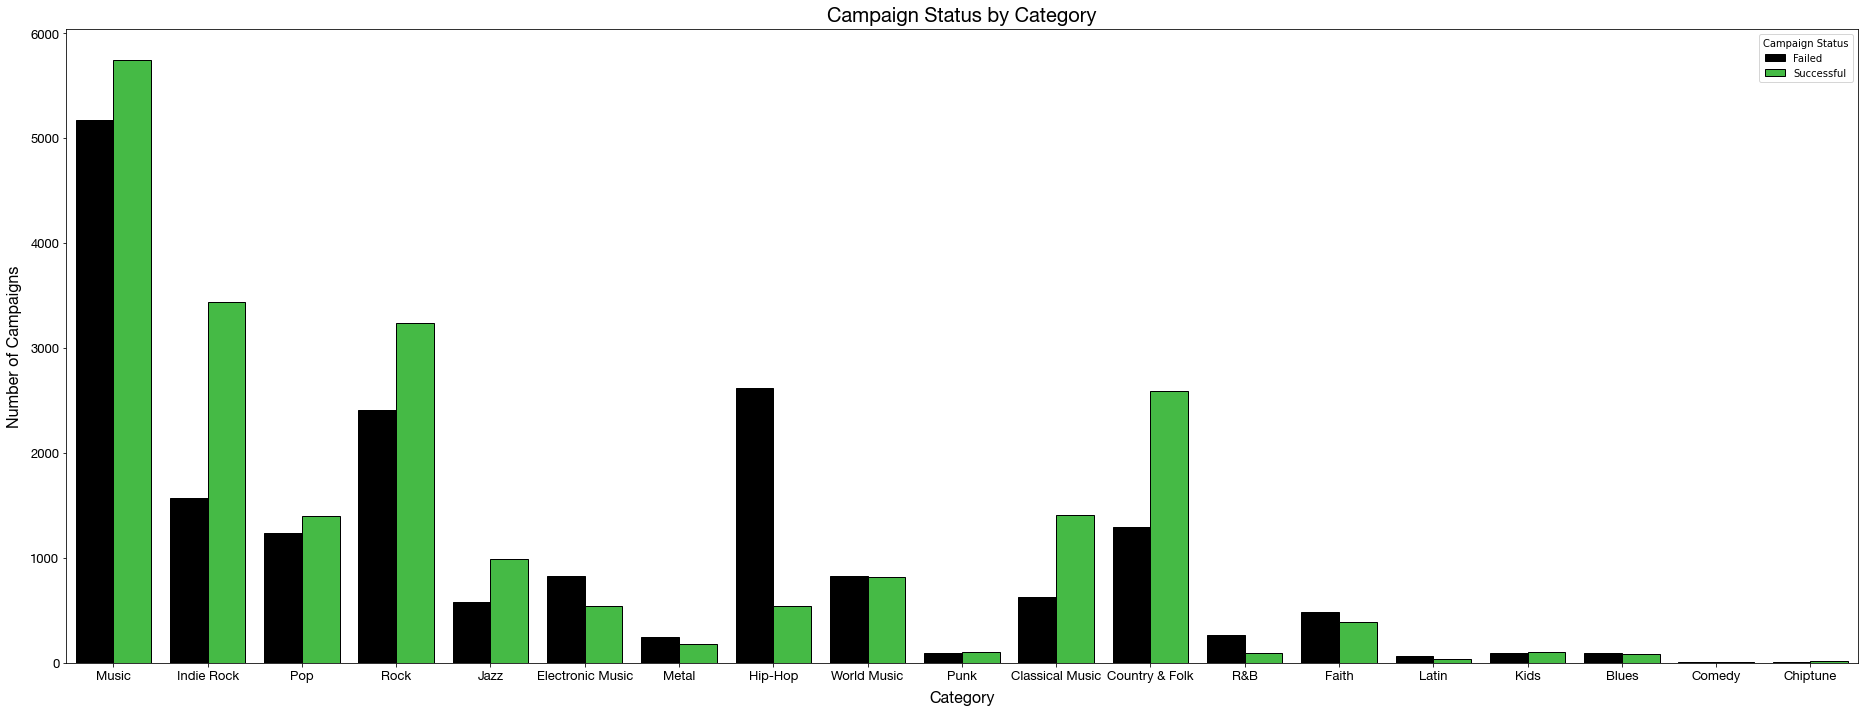

In [20]:
plot_countplot(data = music_subs,
               column = 'category',
               hue = music_subs['Campaign Status'],
               size = (26, 10),
               color = None,
               palette = ['black', 'limegreen'],
               title = 'Campaign Status by Category',
               x_label = 'Category',
               y_label = 'Number of Campaigns')

In the above figure, we see that many genres of music appear to have more successful campaigns than failed campaigns, though it is unclear if all of the differences are statistically significant.

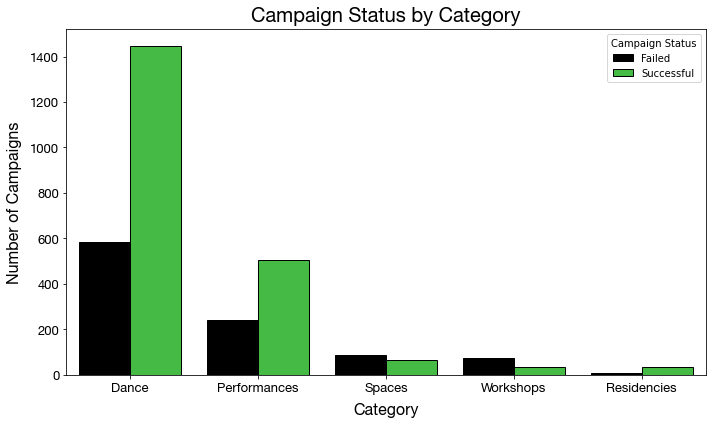

In [21]:
plot_countplot(data = dance_subs,
               column = 'category',
               hue = dance_subs['Campaign Status'],
               size = (10, 6),
               color = None,
               palette = ['black', 'limegreen'],
               title = 'Campaign Status by Category',
               x_label = 'Category',
               y_label = 'Number of Campaigns')

In the above figure, we can see that general dance events and performances have more successful campaigns than failed campaigns.

### What is the distribution of pledge goals for successful vs. failed campaigns?

#### Define Successful vs. Failed Data Frames

In [31]:
success = df[df['Campaign Status'] == 'Successful'].copy().reset_index()
failed = df[df['Campaign Status'] == 'Failed'].copy().reset_index()

#### Descriptive Statistics by Campaign Status (USD) 
In order to compare the pledge goals by campaign status, we can begin by looking at the descriptive statistics.

|Campaign Status| Min| Max| Mean| Std Dev| Median|IQR|
|-|-|-|-|-|-|-|
|Successful| 0.01|2,000,000|9,695.67|28790.07| 4,000.00|1,500-10,000
|Failed| 0.15|100,000,000| 60,663.49|1256873.29| 7,500.00|2,600-20,000

As shown in the table above the pledge goal varies greatly across campaigns. Goals for successful campaigns, however, appear to request less money and are less variable than goals for failed campaigns.

### How do campaign durations differ between successful and failed campaigns?

#### Create a Duration Column (Unit is Days)

In [97]:
df['duration'] = (df['deadline'] - df['launched']) / np.timedelta64(1, 'D')

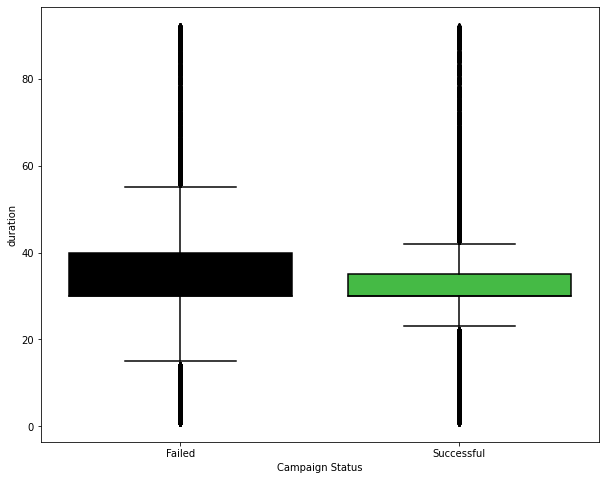

In [105]:
plt.figure(figsize = (10,8))
sns.boxplot(x=df['Campaign Status'], 
            y = df['duration'],
           palette = ['black', 'limegreen']);

In the figure above, we are able to see that campaign length varies greatly. For both successful and failed campaigns, there are several outliers. By looking at the descriptive statistics, we can get a better idea of the distribution.

|Campaign Status| Min| Max| Median| IQR| Mean| Std. Dev.|
|-|-|-|-|-|-|-|
|Successful|1|92|30|30-35|32.4|12|
|Failed|1|92|30|30-40|35.5|13.5


In [ ]:
From the table above, we can see that Min and Max duration do not 